In [1]:
import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from sklearn import preprocessing

In [3]:
df = pd.read_csv('data/heart_disease_data.csv')

In [4]:
df.head()

HeartDisease   BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No 16.60     Yes              No     No            3.00   
1           No 20.34      No             NaN    Yes            0.00   
2           No 26.58     Yes             NaN     No           20.00   
3           No 24.21      No             NaN     No            0.00   
4           No 23.71      No              No     No           28.00   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0         30.00          No  Female        55-59  White      Yes   
1          0.00          No  Female  80 or older  White       No   
2         30.00          No    Male        65-69  White      Yes   
3          0.00          No  Female        75-79  White       No   
4          0.00         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  \
0              Yes  Very good       5.00    Yes            No        Yes   
1              Yes  Very good       7.00     No            No         No   
2              Yes       Fair       8.00    Yes            No         No   
3               No       Good       6.00     No            No        Yes   
4              Yes  Very good       8.00     No            No         No   

  HeartDisease_FamilyHistory State  
0                         No    MT  
1                        NaN    VT  
2                        NaN    WY  
3                         No    VT  
4                        NaN    DC

In [5]:
df.dtypes

HeartDisease                   object
BMI                           float64
Smoking                        object
AlcoholDrinking                object
Stroke                         object
PhysicalHealth                float64
MentalHealth                  float64
DiffWalking                    object
Sex                            object
AgeCategory                    object
Race                           object
Diabetic                       object
PhysicalActivity               object
GenHealth                      object
SleepTime                     float64
Asthma                         object
KidneyDisease                  object
SkinCancer                     object
HeartDisease_FamilyHistory     object
State                          object
dtype: object

In [6]:
df.describe(include=['object']).T

count unique        top    freq
HeartDisease                319795      2         No  292422
Smoking                     319795      2         No  187887
AlcoholDrinking             212984      2         No  191207
Stroke                      318683      2         No  306614
DiffWalking                 319795      2         No  275385
Sex                         319795      2     Female  167805
AgeCategory                 319795     14      65-69   34143
Race                        319795      6      White  245212
Diabetic                    319795      4         No  269653
PhysicalActivity            319795      2        Yes  247957
GenHealth                   319795      5  Very good  113858
Asthma                      319795      2         No  276923
KidneyDisease               319795      2         No  308016
SkinCancer                  319446      2         No  289627
HeartDisease_FamilyHistory   35263      2         No   32008
State                       319795     51         OH    6429

In [7]:
missings = df.isnull().sum()

In [8]:
missings[missings>0]

AlcoholDrinking               106811
Stroke                          1112
SkinCancer                       349
HeartDisease_FamilyHistory    284532
dtype: int64

In [9]:
#preenchendo os dados vazios em AlcoholDrinking como um meio termo (social)
df['AlcoholDrinking'].fillna(value='social', inplace=True)

In [10]:
#drop nas linhas vazias de Stroke
df.dropna(subset=['Stroke'], inplace=True)

In [11]:
#drop nas linhas vazias de SkinCancer
df.dropna(subset=['SkinCancer'], inplace=True)

In [12]:
#drop na coluna HeartDisease History pois temos quase 90% dos dados em falta
df.drop('HeartDisease_FamilyHistory', axis=1, inplace=True)

In [13]:
df_num = df._get_numeric_data()

In [14]:
def plot_box_plots(df, fig_size = (12, 20)):
    """
    df: dataframe with only numerical variables
    fig_size: size of each sub plot
    output: box plots of each variable
    """
    
    #create structure
    fig, axes = plt.subplots(math.ceil(len(df.columns) / 3), 3, figsize = fig_size)

    #iteration by column
    for i, ax in enumerate(fig.axes):
        if i < len(df.columns):
            sns.boxplot(x=df.columns[i], data=df, ax=ax)
    
    # choose when hide figure
    if round((len(df.columns) / 3) % 1, 2) == 0.33:
        axes.flat[-2].set_visible(False)
        axes.flat[-1].set_visible(False)
    elif round((len(df.columns) / 3) % 1, 2) == 0.67:
        axes.flat[-1].set_visible(False)
    else:
        pass
    
    fig.tight_layout()

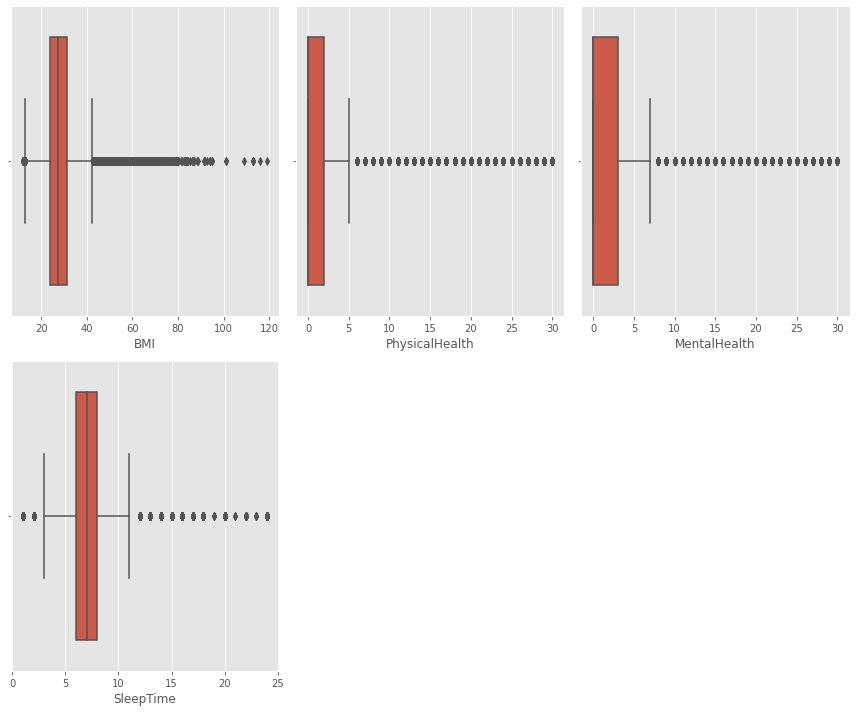

In [15]:
plot_box_plots(df_num, (12, 10))

In [16]:
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1.0, 'No': 0.0})

In [17]:
df['Smoking'] = df['Smoking'].map({'Yes': 1.0, 'No': 0.0})

In [18]:
df['Stroke'] = df['Stroke'].map({'Yes': 1.0, 'No': 0.0})

In [19]:
df['DiffWalking'] = df['DiffWalking'].map({'Yes': 1.0, 'No': 0.0})

In [20]:
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Yes': 1.0, 'No': 0.0})

In [21]:
df['Asthma'] = df['Asthma'].map({'Yes': 1.0, 'No': 0.0})

In [22]:
df['KidneyDisease'] = df['KidneyDisease'].map({'Yes': 1.0, 'No': 0.0})

In [23]:
df['SkinCancer'] = df['SkinCancer'].map({'Yes': 1.0, 'No': 0.0})

In [24]:
df['Sex'] = df['Sex'].map({'Male': 1.0, 'Female': 0.0})

In [25]:
df.describe(include=['object']).T

count unique        top    freq
AlcoholDrinking  318335      3         No  190308
AgeCategory      318335     14      65-69   34000
Race             318335      6      White  244075
Diabetic         318335      4         No  268399
GenHealth        318335      5  Very good  113337
State            318335     51         OH    6395

Analisando o TARGET

In [26]:
df['HeartDisease'].value_counts()

0.00    291072
1.00     27263
Name: HeartDisease, dtype: int64

In [27]:
df['HeartDisease'].value_counts(normalize=True)

0.00   0.91
1.00   0.09
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

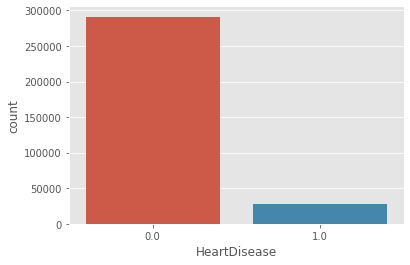

In [28]:
sns.countplot(data=df, x='HeartDisease')

ENCODING

In [29]:
#Transformando a a variavel BMI em categorias de acordo com dados da OMS
BMI_labels = ["AbaixoPeso", "PesoSaudavel", "SobrePeso", "Obeso", 'MuitoObeso']

BMI_ranges = [0, 18.5, 24.9, 29.9, 39.9, df["BMI"].max()]

df["BMI_levels"] = pd.cut(df["BMI"],bins=BMI_ranges,labels=BMI_labels)

In [30]:
#Drop coluna BMI pois já separamos em categorias
df.drop('BMI', axis=1, inplace=True)

In [31]:
#Passando a coluna SleepTime para string para poder fazer o encoding
df['SleepTime'] = df['SleepTime'].astype(str)

In [32]:
#Drop da variavel State, pois aparentemente nao tem influencia no contexto
df.drop('State', axis=1, inplace=True)

In [33]:
#Verificando os dtypes novamente
df.dtypes

HeartDisease         float64
Smoking              float64
AlcoholDrinking       object
Stroke               float64
PhysicalHealth       float64
MentalHealth         float64
DiffWalking          float64
Sex                  float64
AgeCategory           object
Race                  object
Diabetic              object
PhysicalActivity     float64
GenHealth             object
SleepTime             object
Asthma               float64
KidneyDisease        float64
SkinCancer           float64
BMI_levels          category
dtype: object

In [34]:
#Verificando os nulos
df.isna().sum()

HeartDisease        0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
BMI_levels          0
dtype: int64

In [35]:
#Encoding AlcoholDrinking
_dummy_dataset = pd.get_dummies(df['AlcoholDrinking'], prefix='AlcoholDrinking')

In [36]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [37]:
df.drop(['AlcoholDrinking'],axis=1, inplace=True)

In [38]:
#Encoding AgeCategory
_dummy_dataset = pd.get_dummies(df['AgeCategory'], prefix='Age')

In [39]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [40]:
df.drop(['AgeCategory'],axis=1, inplace=True)

In [41]:
#Encoding Race
_dummy_dataset = pd.get_dummies(df['Race'], prefix='Race')

In [42]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [43]:
df.drop(['Race'],axis=1, inplace=True)

In [44]:
#Encoding Diabetic
_dummy_dataset = pd.get_dummies(df['Diabetic'], prefix='Diabetic')

In [45]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [46]:
df.drop(['Diabetic'],axis=1, inplace=True)

In [47]:
#Encoding GenHealth
_dummy_dataset = pd.get_dummies(df['GenHealth'], prefix='GenHealth')

In [48]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [49]:
df.drop(['GenHealth'],axis=1, inplace=True)

In [50]:
#Encoding SleepTime
_dummy_dataset = pd.get_dummies(df['SleepTime'], prefix='SleepTime')

In [51]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [52]:
df.drop(['SleepTime'],axis=1, inplace=True)

In [53]:
#Encoding BMI_levels
_dummy_dataset = pd.get_dummies(df['BMI_levels'], prefix='BMI_levels')

In [54]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [55]:
df.drop(['BMI_levels'],axis=1, inplace=True)

In [56]:
#Encoding MentalHealth
_dummy_dataset = pd.get_dummies(df['MentalHealth'], prefix='MentalHealth')

In [57]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [58]:
df.drop(['MentalHealth'],axis=1, inplace=True)

In [59]:
#Encoding PhysicalHealth
_dummy_dataset = pd.get_dummies(df['PhysicalHealth'], prefix='PhysicalHealth')

In [60]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [61]:
df.drop(['PhysicalHealth'],axis=1, inplace=True)

In [62]:
df.head().T

0    1    2    3    4
HeartDisease                        0.00 0.00 0.00 0.00 0.00
Smoking                             1.00 0.00 1.00 0.00 0.00
Stroke                              0.00 1.00 0.00 0.00 0.00
DiffWalking                         0.00 0.00 0.00 0.00 1.00
Sex                                 0.00 0.00 1.00 0.00 0.00
PhysicalActivity                    1.00 1.00 1.00 0.00 1.00
Asthma                              1.00 0.00 1.00 0.00 0.00
KidneyDisease                       0.00 0.00 0.00 0.00 0.00
SkinCancer                          1.00 0.00 0.00 1.00 0.00
AlcoholDrinking_No                  1.00 0.00 0.00 0.00 1.00
AlcoholDrinking_Yes                 0.00 0.00 0.00 0.00 0.00
AlcoholDrinking_social              0.00 1.00 1.00 1.00 0.00
Age_0                               0.00 0.00 0.00 0.00 0.00
Age_18-24                           0.00 0.00 0.00 0.00 0.00
Age_25-29                           0.00 0.00 0.00 0.00 0.00
Age_30-34                           0.00 0.00 0.00 0.00 0.00
Age_35-39                           0.00 0.00 0.00 0.00 0.00
Age_40-44                           0.00 0.00 0.00 0.00 1.00
Age_45-49                           0.00 0.00 0.00 0.00 0.00
Age_50-54                           0.00 0.00 0.00 0.00 0.00
Age_55-59                           1.00 0.00 0.00 0.00 0.00
Age_60-64                           0.00 0.00 0.00 0.00 0.00
Age_65-69                           0.00 0.00 1.00 0.00 0.00
Age_70-74                           0.00 0.00 0.00 0.00 0.00
Age_75-79                           0.00 0.00 0.00 1.00 0.00
Age_80 or older                     0.00 1.00 0.00 0.00 0.00
Race_American Indian/Alaskan Native 0.00 0.00 0.00 0.00 0.00
Race_Asian                          0.00 0.00 0.00 0.00 0.00
Race_Black                          0.00 0.00 0.00 0.00 0.00
Race_Hispanic                       0.00 0.00 0.00 0.00 0.00
Race_Other                          0.00 0.00 0.00 0.00 0.00
Race_White                          1.00 1.00 1.00 1.00 1.00
Diabetic_No                         0.00 1.00 0.00 1.00 1.00
Diabetic_No, borderline diabetes    0.00 0.00 0.00 0.00 0.00
Diabetic_Yes                        1.00 0.00 1.00 0.00 0.00
Diabetic_Yes (during pregnancy)     0.00 0.00 0.00 0.00 0.00
GenHealth_Excellent                 0.00 0.00 0.00 0.00 0.00
GenHealth_Fair                      0.00 0.00 1.00 0.00 0.00
GenHealth_Good                      0.00 0.00 0.00 1.00 0.00
GenHealth_Poor                      0.00 0.00 0.00 0.00 0.00
GenHealth_Very good                 1.00 1.00 0.00 0.00 1.00
SleepTime_1.0                       0.00 0.00 0.00 0.00 0.00
SleepTime_10.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_11.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_12.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_13.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_14.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_15.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_16.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_17.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_18.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_19.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_2.0                       0.00 0.00 0.00 0.00 0.00
SleepTime_20.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_21.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_22.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_23.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_24.0                      0.00 0.00 0.00 0.00 0.00
SleepTime_3.0                       0.00 0.00 0.00 0.00 0.00
SleepTime_4.0                       0.00 0.00 0.00 0.00 0.00
SleepTime_5.0                       1.00 0.00 0.00 0.00 0.00
SleepTime_6.0                       0.00 0.00 0.00 1.00 0.00
SleepTime_7.0                       0.00 1.00 0.00 0.00 0.00
SleepTime_8.0                       0.00 0.00 1.00 0.00 1.00
SleepTime_9.0                       0.00 0.00 0.00 0.00 0.00
BMI_levels_Ab

DATASET BALANCE - Undersampling the majority class

In [63]:
minority_class = df[df['HeartDisease'] == 1]
majority_class = df[df['HeartDisease'] == 0]

undersampled_majority = majority_class.sample(n=len(minority_class))

balanced_df = pd.concat([minority_class, undersampled_majority])

MODELO DECISION TREE

In [64]:
from sklearn import model_selection 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [65]:
df_X = balanced_df.drop('HeartDisease', axis=1)
df_y = balanced_df[['HeartDisease']]

In [99]:
#Treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        df_X, # X 
                                        df_y, # y
                                        test_size = 0.20, 
                                        random_state = 42
                                     )

In [100]:
#Separando treino e validacao (80 / 20)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [101]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32715 entries, 135691 to 263721
Columns: 131 entries, Smoking to PhysicalHealth_30.0
dtypes: float64(8), uint8(123)
memory usage: 6.1 MB


In [102]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10906 entries, 114941 to 140072
Columns: 131 entries, Smoking to PhysicalHealth_30.0
dtypes: float64(8), uint8(123)
memory usage: 2.0 MB


In [103]:
X_train.describe().T

count  mean  std  min  25%  50%  75%  \
Smoking                             32,715.00  0.49 0.50 0.00 0.00 0.00 1.00   
Stroke                              32,715.00  0.09 0.29 0.00 0.00 0.00 0.00   
DiffWalking                         32,715.00  0.24 0.43 0.00 0.00 0.00 0.00   
Sex                                 32,715.00  0.53 0.50 0.00 0.00 1.00 1.00   
PhysicalActivity                    32,715.00  0.72 0.45 0.00 0.00 1.00 1.00   
Asthma                              32,715.00  0.15 0.36 0.00 0.00 0.00 0.00   
KidneyDisease                       32,715.00  0.08 0.27 0.00 0.00 0.00 0.00   
SkinCancer                          32,715.00  0.14 0.34 0.00 0.00 0.00 0.00   
AlcoholDrinking_No                  32,715.00  0.61 0.49 0.00 0.00 1.00 1.00   
AlcoholDrinking_Yes                 32,715.00  0.06 0.23 0.00 0.00 0.00 0.00   
AlcoholDrinking_social              32,715.00  0.34 0.47 0.00 0.00 0.00 1.00   
Age_0                               32,715.00  0.00 0.01 0.00 0.00 0.00 0.00   
Age_18-24                           32,715.00  0.04 0.19 0.00 0.00 0.00 0.00   
Age_25-29                           32,715.00  0.03 0.18 0.00 0.00 0.00 0.00   
Age_30-34                           32,715.00  0.04 0.19 0.00 0.00 0.00 0.00   
Age_35-39                           32,715.00  0.04 0.20 0.00 0.00 0.00 0.00   
Age_40-44                           32,715.00  0.04 0.20 0.00 0.00 0.00 0.00   
Age_45-49                           32,715.00  0.05 0.22 0.00 0.00 0.00 0.00   
Age_50-54                           32,715.00  0.06 0.25 0.00 0.00 0.00 0.00   
Age_55-59                           32,715.00  0.09 0.28 0.00 0.00 0.00 0.00   
Age_60-64                           32,715.00  0.11 0.31 0.00 0.00 0.00 0.00   
Age_65-69                           32,715.00  0.13 0.33 0.00 0.00 0.00 0.00   
Age_70-74                           32,715.00  0.13 0.34 0.00 0.00 0.00 0.00   
Age_75-79                           32,715.00  0.10 0.31 0.00 0.00 0.00 0.00   
Age_80 or older                     32,715.00  0.13 0.34 0.00 0.00 0.00 0.00   
Race_American Indian/Alaskan Native 32,715.00  0.02 0.13 0.00 0.00 0.00 0.00   
Race_Asian                          32,715.00  0.02 0.14 0.00 0.00 0.00 0.00   
Race_Black                          32,715.00  0.07 0.25 0.00 0.00 0.00 0.00   
Race_Hispanic                       32,715.00  0.07 0.26 0.00 0.00 0.00 0.00   
Race_Other                          32,715.00  0.04 0.18 0.00 0.00 0.00 0.00   
Race_White                          32,715.00  0.79 0.41 0.00 1.00 1.00 1.00   
Diabetic_No                         32,715.00  0.75 0.43 0.00 1.00 1.00 1.00   
Diabetic_No, borderline diabetes    32,715.00  0.02 0.15 0.00 0.00 0.00 0.00   
Diabetic_Yes                        32,715.00  0.22 0.41 0.00 0.00 0.00 0.00   
Diabetic_Yes (during pregnancy)     32,715.00  0.01 0.08 0.00 0.00 0.00 0.00   
GenHealth_Excellent                 32,715.00  0.14 0.35 0.00 0.00 0.00 0.00   
GenHealth_Fair                      32,715.00  0.18 0.38 0.00 0.00 0.00 0.00   
GenHealth_Good                      32,715.00  0.32 0.46 0.00 0.00 0.00 1.00   
GenHealth_Poor                      32,715.00  0.08 0.28 0.00 0.00 0.00 0.00   
GenHealth_Very good                 32,715.00  0.29 0.45 0.00 0.00 0.00 1.00   
SleepTime_1.0                       32,715.00  0.00 0.04 0.00 0.00 0.00 0.00   
SleepTime_10.0                      32,715.00  0.03 0.18 0.00 0.00 0.00 0.00   
SleepTime_11.0                      32,715.00  0.00 0.04 0.00 0.00 0.00 0.00   
SleepTime_12.0                      32,715.00  0.01 0.10 0.00 0.00 0.00 0.00   
SleepTime_13.0                      32,715.00  0.00 0.02 0.00 0.00 0.00 0.00   
SleepTime_14.0                      32,715.00  0.00 0.03 0.00 0.00 0.00 0.00   
SleepTime_15.0                      32,715.00  0.00 0.03 0.00 0.00 0.00 0.00   
SleepTime_16.0                      32,715.00  0.00 0.03 0.00 0.00 0.00 0.00   
SleepTime_17.0                      32,715.00  0.00 0.01 0.00 0.00 0.00 0.00   
SleepTime_18.0                      32,7

In [104]:
X_test.describe().T.head()

count  mean  std  min  25%  50%  75%  max
Smoking          10,906.00  0.49 0.50 0.00 0.00 0.00 1.00 1.00
Stroke           10,906.00  0.09 0.29 0.00 0.00 0.00 0.00 1.00
DiffWalking      10,906.00  0.24 0.43 0.00 0.00 0.00 0.00 1.00
Sex              10,906.00  0.53 0.50 0.00 0.00 1.00 1.00 1.00
PhysicalActivity 10,906.00  0.72 0.45 0.00 0.00 1.00 1.00 1.00

In [105]:
y_train.describe().T.head()

count  mean  std  min  25%  50%  75%  max
HeartDisease 32,715.00  0.50 0.50 0.00 0.00 0.00 1.00 1.00

In [106]:
y_test.describe().T.head()

count  mean  std  min  25%  50%  75%  max
HeartDisease 10,906.00  0.50 0.50 0.00 0.00 0.00 1.00 1.00

In [107]:
X_val.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10905 entries, 142691 to 96195
Columns: 131 entries, Smoking to PhysicalHealth_30.0
dtypes: float64(8), uint8(123)
memory usage: 2.0 MB


In [108]:
y_val.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10905 entries, 142691 to 96195
Columns: 1 entries, HeartDisease to HeartDisease
dtypes: float64(1)
memory usage: 170.4 KB


In [109]:
X_val.describe().T.head()

count  mean  std  min  25%  50%  75%  max
Smoking          10,905.00  0.50 0.50 0.00 0.00 0.00 1.00 1.00
Stroke           10,905.00  0.10 0.30 0.00 0.00 0.00 0.00 1.00
DiffWalking      10,905.00  0.25 0.43 0.00 0.00 0.00 0.00 1.00
Sex              10,905.00  0.52 0.50 0.00 0.00 1.00 1.00 1.00
PhysicalActivity 10,905.00  0.71 0.45 0.00 0.00 1.00 1.00 1.00

In [110]:
y_val.describe().T.head()

count  mean  std  min  25%  50%  75%  max
HeartDisease 10,905.00  0.51 0.50 0.00 0.00 1.00 1.00 1.00

DECISION TREE

In [111]:
#Definindo parametros e max_depth para Decision Tree

In [181]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [None, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 5, 6, 7, 8, 9, 10, 11, 12, 13]
}


dt_best = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_best, param_grid, cv=5, scoring='recall_micro')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best score:", best_score)


Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 11, 'min_samples_split': 2}
Best score: 0.749167048754394


In [293]:
#confirmando intervalos de max_depth
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Tree max_depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree max_depth: 1. Train: 0.6226501604768455 - Test: 0.630020172382175
Tree max_depth: 2. Train: 0.6677059452850375 - Test: 0.6732991014120667
Tree max_depth: 3. Train: 0.6928626012532477 - Test: 0.6964973409132588
Tree max_depth: 4. Train: 0.7085434815833715 - Test: 0.7097927746194755
Tree max_depth: 5. Train: 0.7210759590401956 - Test: 0.7215294333394462
Tree max_depth: 6. Train: 0.7296958581690356 - Test: 0.7268476068219328
Tree max_depth: 7. Train: 0.7450099342809109 - Test: 0.7350999449844122
Tree max_depth: 8. Train: 0.7576646798104845 - Test: 0.7411516596368971
Tree max_depth: 9. Train: 0.7651535992663916 - Test: 0.7439024390243902
Tree max_depth: 10. Train: 0.7745071068317285 - Test: 0.7494039977993765
Tree max_depth: 11. Train: 0.7840134494880024 - Test: 0.747203374289382
Tree max_depth: 12. Train: 0.7941005654898364 - Test: 0.746378140473134
Tree max_depth: 13. Train: 0.8041571144734831 - Test: 0.7396845772969007
Tree max_depth: 14. Train: 0.8151306740027511 - Test: 0.7361085

In [182]:
#selecionamos o parametro 8, pois é onde temos um melhor score tanto em treino quanto em teste, com uma menor diferença
dt = DecisionTreeClassifier(
                        max_depth=9, 
                        min_samples_split=2, 
                        min_samples_leaf=11,
                        random_state=42
                )

In [183]:
### Train model
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=11, random_state=42)

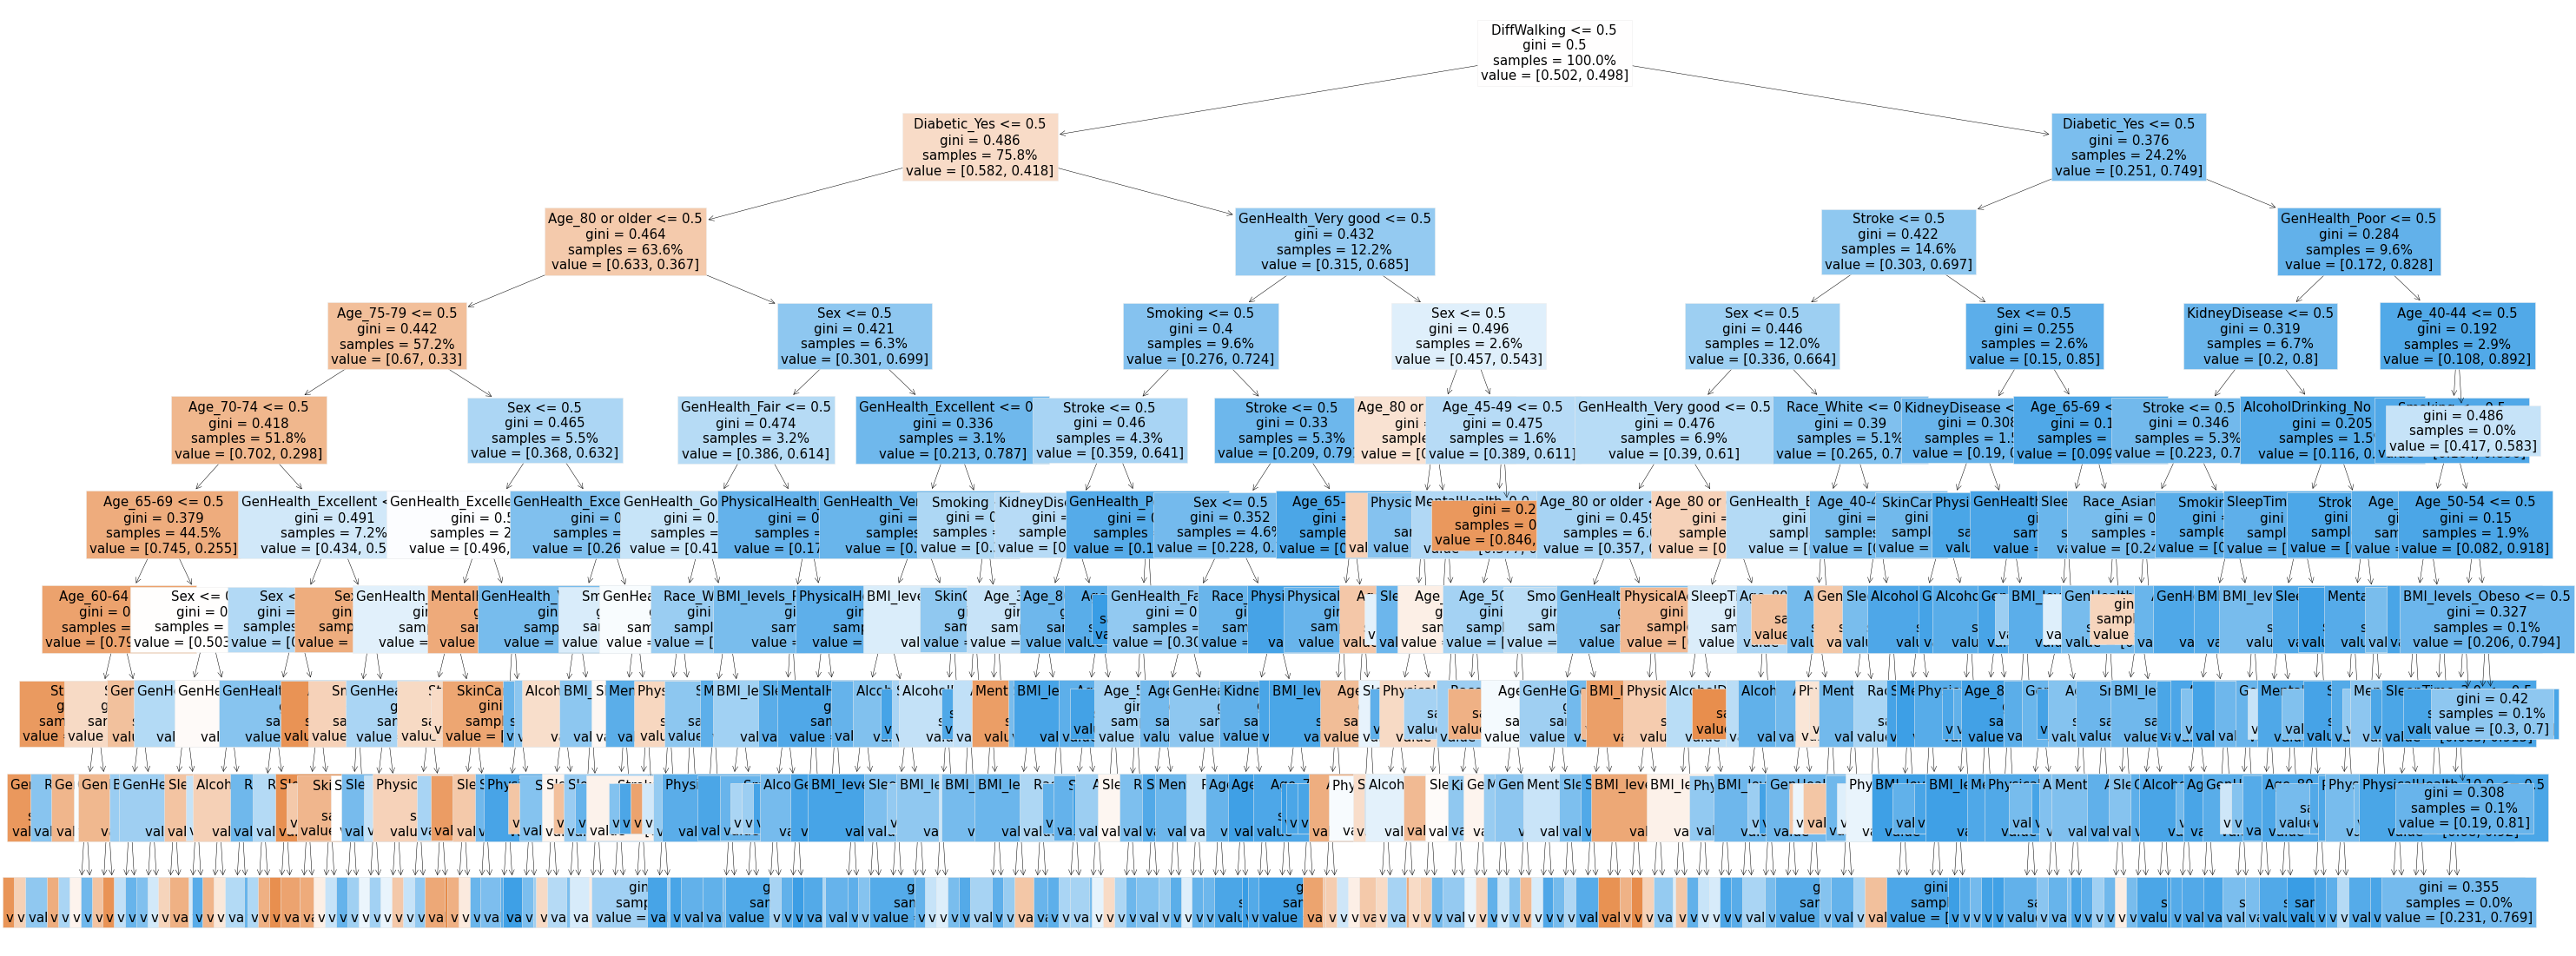

In [184]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(dt, 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               feature_names = X_test.columns);


Text(0.5, 0, 'Random Forest Feature Importance')

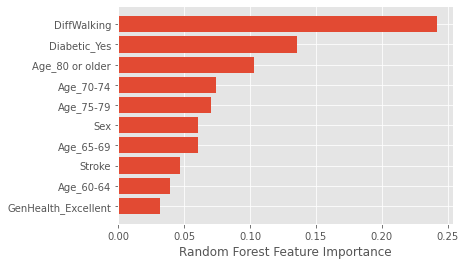

In [185]:
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:], dt.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")

In [186]:
#testando na base de treino
y_train_pred = pd.DataFrame(dt.predict(X_train), index=y_train.index, columns=['HeartDiseasePrediction'])

results_df = y_train.join(y_train_pred, how= 'inner')

results_df['Success'] = (results_df['HeartDisease'] == results_df['HeartDiseasePrediction']).astype(int)

In [187]:
results_df.head(20)

HeartDisease  HeartDiseasePrediction  Success
135691          0.00                    0.00        1
134353          0.00                    0.00        1
195068          1.00                    0.00        0
160731          0.00                    0.00        1
35322           0.00                    0.00        1
190360          1.00                    1.00        1
116317          0.00                    1.00        0
209837          1.00                    1.00        1
263172          0.00                    0.00        1
104255          1.00                    1.00        1
218170          1.00                    1.00        1
230834          1.00                    1.00        1
268298          0.00                    0.00        1
247344          1.00                    1.00        1
214494          0.00                    0.00        1
34486           1.00                    0.00        0
39343           1.00                    1.00        1
175699          1.00                    1.00        1
140742          0.00                    0.00        1
232165          1.00                    1.00        1

In [188]:
results_df['Success'].mean()

0.759162463701666

In [189]:
confusion_matrix = pd.crosstab(results_df['HeartDisease'], results_df['HeartDiseasePrediction'])

In [190]:
confusion_matrix

HeartDiseasePrediction   0.00   1.00
HeartDisease                        
0.00                    11999   4420
1.00                     3459  12837

In this disease prediction scenario, we always want to identify people with the disease, even if this comes with the risk of a false positive. Here, we will build the model to have higher recall than precision.

In [191]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [192]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

accuracy

0.759162463701666

In [193]:
Precision = TP / (TP+FP)
Recall = TP/(TP+FN)
print(Precision)
print(Recall)

0.7438720519209596
0.7877393225331369


In [195]:
#Score da base de teste
dt.score(X_test, y_test)

0.7480286081056299

APLICANDO NA BASE DE TESTE

In [197]:
#Classificando na base de test
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['HeartDiseasePrediction'])

In [198]:
results_df_test = y_test.join(y_test_pred, how= 'inner')
results_df_test['Success'] = (results_df_test['HeartDisease'] == results_df_test['HeartDiseasePrediction']).astype(int)

In [199]:
results_df_test.head()

HeartDisease  HeartDiseasePrediction  Success
114941          1.00                    1.00        1
328             0.00                    1.00        0
262839          1.00                    1.00        1
19403           0.00                    1.00        0
10233           1.00                    1.00        1

In [292]:
#Metricas base de teste
Accuracy_m_test = metrics.accuracy_score(results_df_test['HeartDisease'], results_df_test['HeartDiseasePrediction'])
Precision_m_test = metrics.precision_score(results_df_test['HeartDisease'],results_df_test['HeartDiseasePrediction'])
Recall_m_test = metrics.recall_score(results_df_test['HeartDisease'],results_df_test['HeartDiseasePrediction'])
f1_m_test = metrics.f1_score(results_df_test['HeartDisease'],results_df_test['HeartDiseasePrediction'])

print("Accuracy: ", Accuracy_m_test)
print("Precision: ", Precision_m_test)
print("Recall: ", Recall_m_test)
print("F1 Score: ", f1_m_test)

Accuracy:  0.7480286081056299
Precision:  0.7346652646337188
Recall:  0.7725764835974935
F1 Score:  0.7531440891124686


TESTANDO NA BASE DE VALIDACAO

In [203]:
y_val_pred = pd.DataFrame(dt.predict(X_val), index=y_val.index, columns=['HeartDiseasePrediction'])

In [206]:
results_df_val = y_val.join(y_val_pred, how= 'inner')
results_df_val['Success'] = (results_df_val['HeartDisease'] == results_df_val['HeartDiseasePrediction']).astype(int)

In [207]:
results_df_val.head()

HeartDisease  HeartDiseasePrediction  Success
142691          0.00                    1.00        0
65766           0.00                    1.00        0
221334          0.00                    0.00        1
69329           0.00                    1.00        0
154842          1.00                    0.00        0

In [295]:
#Metricas base de validaçao
Accuracy_m_val = metrics.accuracy_score(results_df_val['HeartDisease'], results_df_val['HeartDiseasePrediction'])
Precision_m_val = metrics.precision_score(results_df_val['HeartDisease'],results_df_val['HeartDiseasePrediction'])
Recall_m_val = metrics.recall_score(results_df_val['HeartDisease'],results_df_val['HeartDiseasePrediction'])
f1_m_test = metrics.f1_score(results_df_val['HeartDisease'],results_df_val['HeartDiseasePrediction'])

print("Accuracy: ", Accuracy_m_val)
print("Precision: ", Precision_m_val)
print("Recall: ", Recall_m_val)
print("F1 Score: ", f1_m_test)

Accuracy:  0.7435121503897295
Precision:  0.7346903865891208
Recall:  0.7751308428081574
F1 Score:  0.7543690173004303


In [211]:
#Comparando o score nas 3 bases
score_train = dt.score(X_train, y_train)
score_test = dt.score(X_test, y_test)
score_val = dt.score(X_val, y_val)

print("Score TRAIN: ", score_train)
print("Score TEST: ", score_test)
print("Score VALIDACAO: ", score_val)

Score TRAIN:  0.759162463701666
Score TEST:  0.7480286081056299
Score VALIDACAO:  0.7435121503897295


In [217]:
y_val_pred = pd.DataFrame({'HeartDiseasePrediction' : dt.predict(X_val), 
                            'HeartDiseaseScore': dt.predict_proba(X_val)[:,1]},
                            index=y_val.index)
results_df_val = y_val.join(y_val_pred, how= 'inner')
results_df_val['Success'] = (results_df_val['HeartDisease'] == results_df_val['HeartDiseaseScore']).astype(int)

In [219]:
print(metrics.roc_auc_score(results_df_val['HeartDisease'],results_df_val['HeartDiseaseScore']))

0.8031596978715105


In [223]:
fpr, tpr, _ = metrics.roc_curve(results_df_val['HeartDisease'], results_df_val['HeartDiseaseScore'])

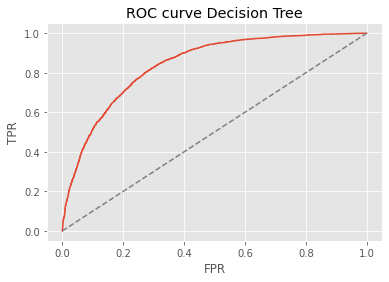

In [380]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Decision Tree')
plt.show()

VALIDACAO K-FOLD DA ARVORE DE DECISAO

In [365]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [369]:
dt = DecisionTreeClassifier(max_depth=9, random_state=42)
scores = model_selection.cross_val_score(dt, df_X, df_y, cv=kf)

In [370]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.743 (+/- 0.013)


MODELO RANDOM FOREST

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [290]:
for i in range(1, 20):
    rf = RandomForestClassifier(max_depth=i, random_state=42, min_samples_split=50)
    rf.fit(X_train, np.ravel(y_train))
    train_accuracy = rf.score(X_train, np.ravel(y_train))
    test_accuracy = rf.score(X_test, np.ravel(y_test))
    print('Tree Depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree Depth: 1. Train: 0.7110805440929238 - Test: 0.7134604804694663
Tree Depth: 2. Train: 0.7174079168577105 - Test: 0.7162112598569594
Tree Depth: 3. Train: 0.7169188445667125 - Test: 0.7177700348432056
Tree Depth: 4. Train: 0.7248051352590554 - Test: 0.7238217494956904
Tree Depth: 5. Train: 0.734036374751643 - Test: 0.732807628828168
Tree Depth: 6. Train: 0.7384685923888125 - Test: 0.7367504126169081
Tree Depth: 7. Train: 0.7424117377349839 - Test: 0.7395011920044012
Tree Depth: 8. Train: 0.747210759590402 - Test: 0.7434439757931414
Tree Depth: 9. Train: 0.7529267919914412 - Test: 0.7483036860443792
Tree Depth: 10. Train: 0.7595904019562891 - Test: 0.750779387493123
Tree Depth: 11. Train: 0.7627693718477763 - Test: 0.7520630845406199
Tree Depth: 12. Train: 0.767629527739569 - Test: 0.7546304786356134
Tree Depth: 13. Train: 0.7694024147944368 - Test: 0.7556390977443609
Tree Depth: 14. Train: 0.7738957664679811 - Test: 0.7569227947918576
Tree Depth: 15. Train: 0.7767996331957817 - Test

In [297]:
rf = RandomForestClassifier()

#Parametros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [8, 10, 13],
    'min_samples_split': [10, 50, 100],
    'min_samples_leaf': [1, 5, 10],
}


grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='recall_micro')
grid_search.fit(X_train, np.ravel(y_train))

rf_best_params = grid_search.best_params_
rf_best_score = grid_search.best_score_
print("Melhores parâmetros:", rf_best_params)
print("Melhor pontuação:", rf_best_score)

Melhores parâmetros: {'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 100, 'n_estimators': 150}
Melhor pontuação: 0.7567782362830505


In [249]:
top_features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

<AxesSubplot:>

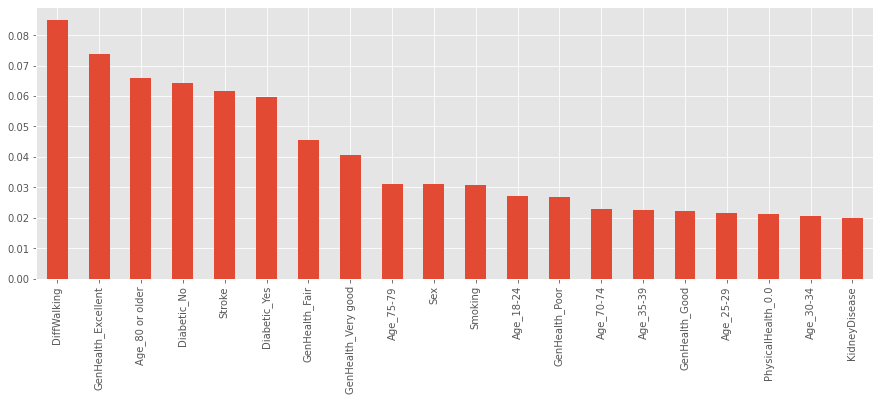

In [250]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

In [399]:
rf = RandomForestClassifier(n_estimators=150, max_depth=13, min_samples_split=50, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=13, min_samples_split=50, n_estimators=150,
                       random_state=42)

In [400]:
tree_list = rf.estimators_

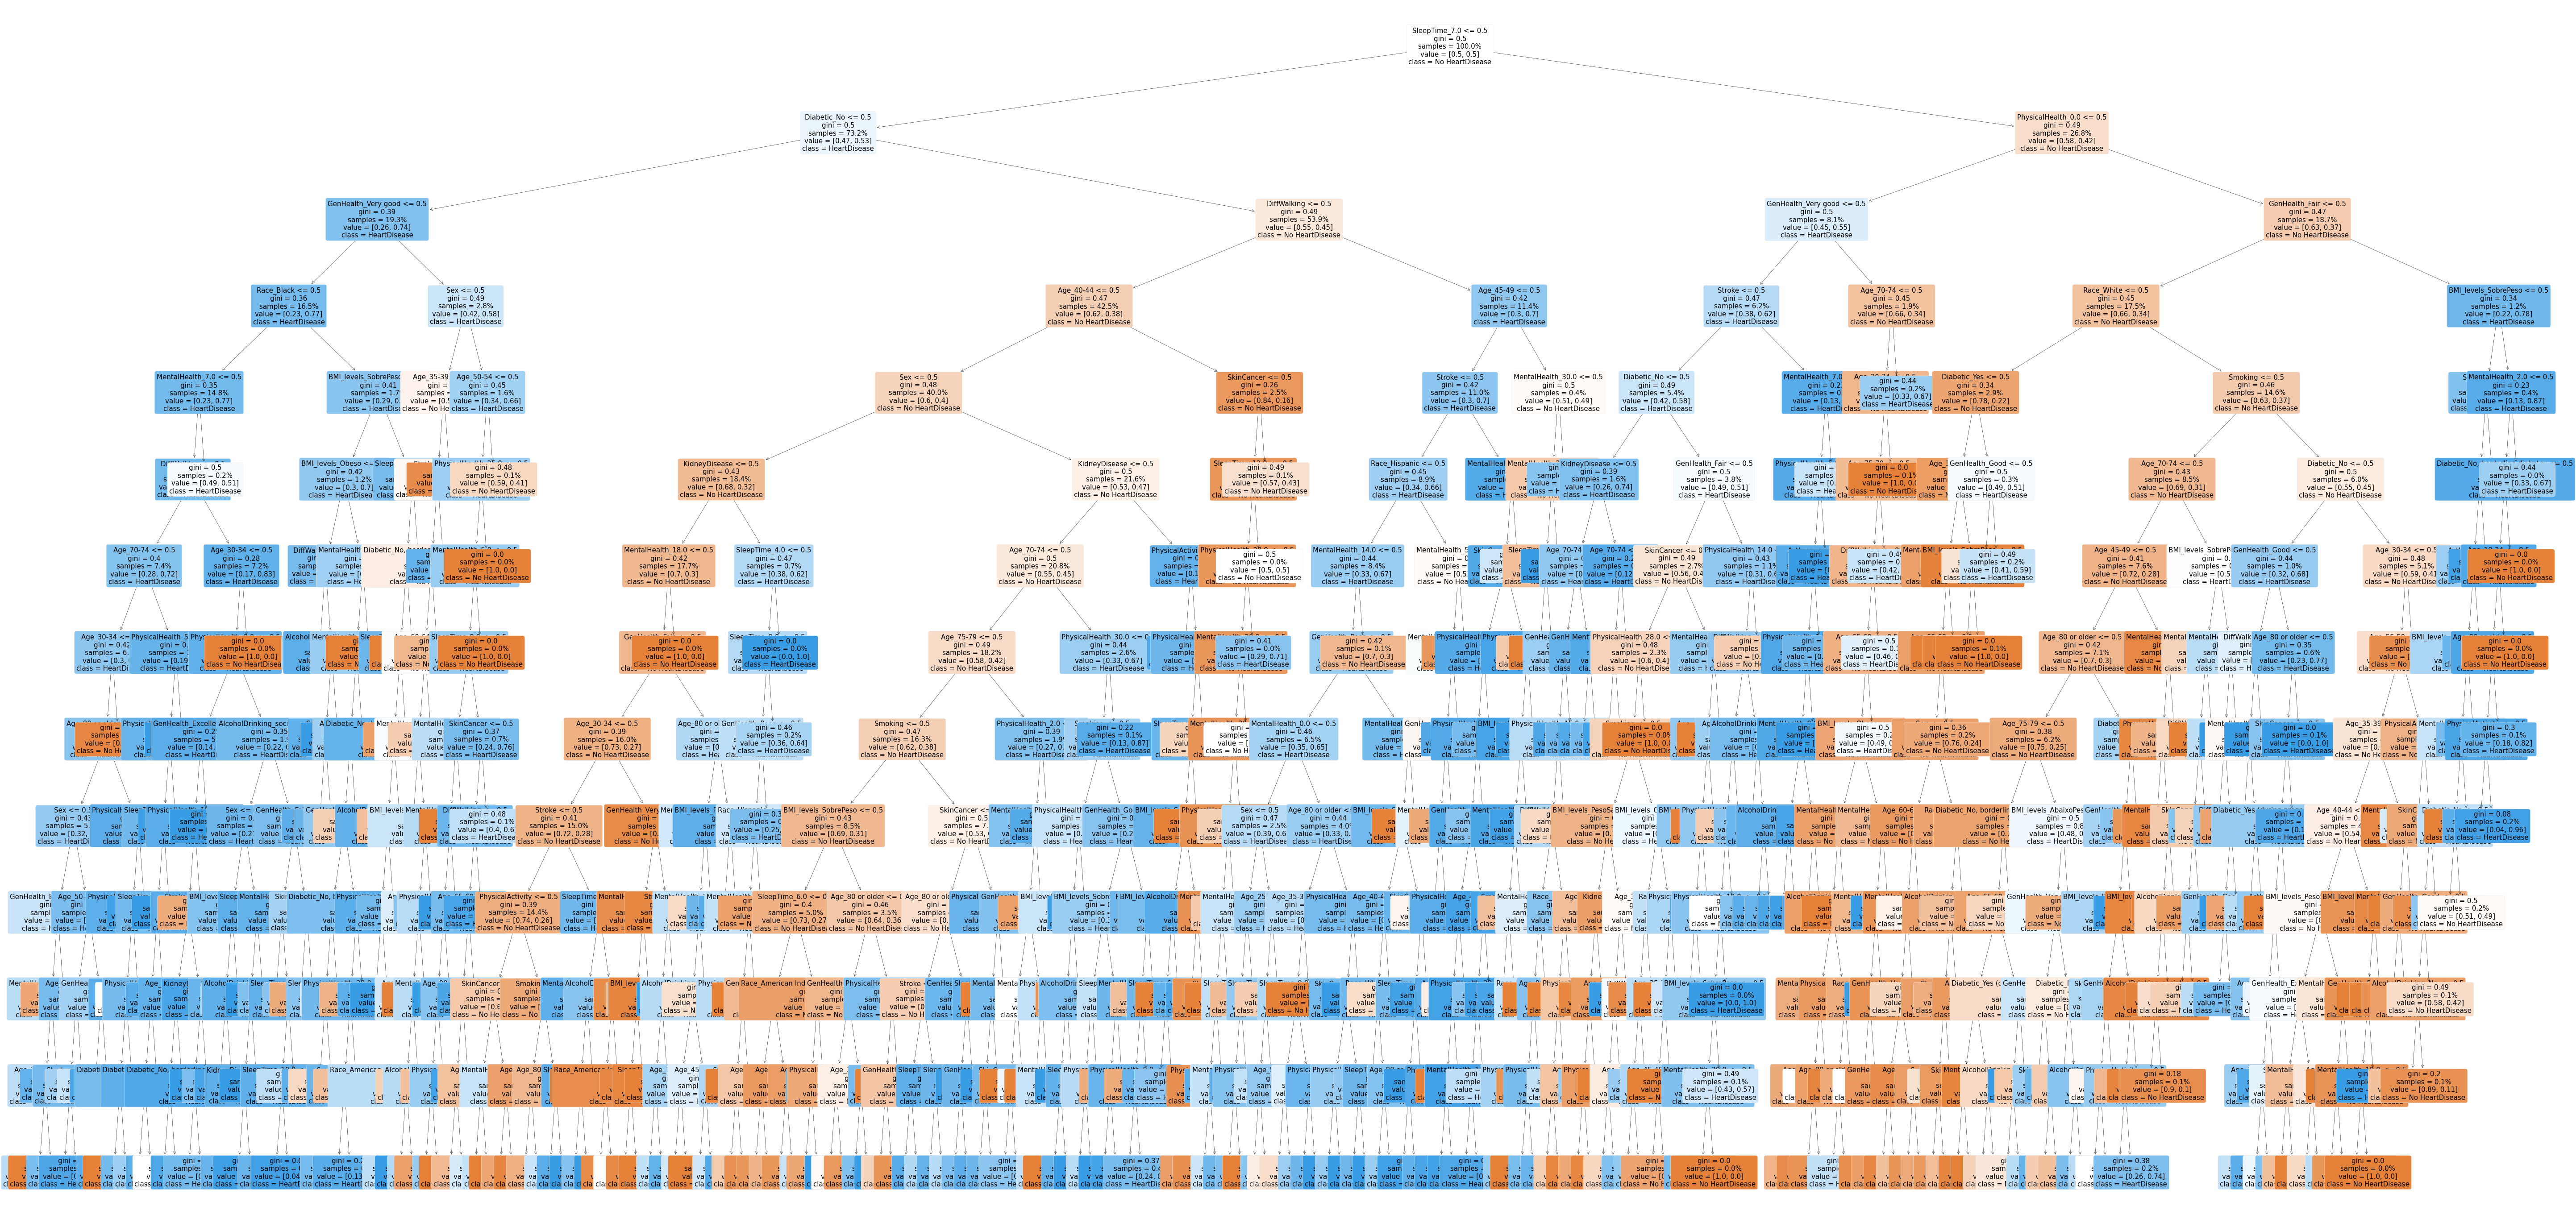

In [411]:
fig, ax = plt.subplots(figsize=(100,50))
tree.plot_tree(tree_list[0], 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               impurity=True,
                rounded = True,
               precision = 2,

               class_names = ['No HeartDisease', 'HeartDisease'],
               feature_names = X_test.columns);

In [335]:
#Definindo metricas na base de teste
y_score_rf = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index, columns=['HeartDiseaseScore'])

In [336]:
results_df_rf_test = y_test.join(y_score_rf)

In [337]:
results_df_rf_test.head(10)

HeartDisease  HeartDiseaseScore
114941          1.00               0.65
328             0.00               0.61
262839          1.00               0.84
19403           0.00               0.73
10233           1.00               0.57
176962          0.00               0.50
124685          0.00               0.37
19610           1.00               0.81
17976           1.00               0.84
305562          0.00               0.44

In [348]:
print(metrics.roc_auc_score(results_df_rf_test['HeartDisease'], results_df_rf_test['HeartDiseaseScore']))

0.83383188473449


In [342]:
#Definindo metricas na base de validacao
y_score_rf_val = pd.DataFrame(rf.predict_proba(X_val)[:,1], index=y_val.index, columns=['HeartDiseaseScore'])

In [343]:
results_df_rf_val = y_val.join(y_score_rf_val)

In [345]:
results_df_rf_val.head()

HeartDisease  HeartDiseaseScore
142691          0.00               0.69
65766           0.00               0.75
221334          0.00               0.51
69329           0.00               0.56
154842          1.00               0.51

In [339]:
print(metrics.roc_auc_score(results_df_rf_val['HeartDisease'], results_df_rf_val['HeartDiseaseScore']))

0.83383188473449


In [346]:
fpr, tpr, _ = metrics.roc_curve(results_df_rf_val['HeartDisease'], results_df_rf_val['HeartDiseaseScore'])

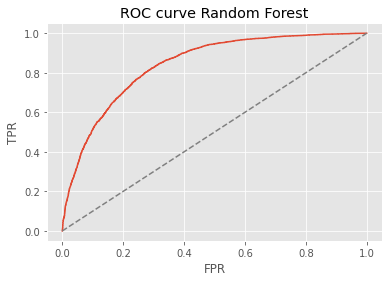

In [379]:
#Curva ROC Random Forest
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Random Forest')
plt.show()

In [305]:
#Perfromance nas bases treino teste e validacao
#Comparando o score nas 3 bases
score_train_rf = rf.score(X_train, y_train)
score_test_rf = rf.score(X_test, y_test)
score_val_rf = rf.score(X_val, y_val)

print("Score TRAIN: ", score_train_rf)
print("Score TEST: ", score_test_rf)
print("Score VALIDACAO: ", score_val_rf)

Score TRAIN:  0.7695246828671863
Score TEST:  0.75600586832936
Score VALIDACAO:  0.755433287482806


In [375]:
#K-Fold validation Random Forest
rf = RandomForestClassifier(max_depth=13, random_state=42)
rf_scores = model_selection.cross_val_score(rf, df_X, np.ravel(df_y), cv=kf)

In [373]:
print("Accuracy: %0.3f (+/- %0.3f)" % (rf_scores.mean(), rf_scores.std() * 2))

Accuracy: 0.743 (+/- 0.013)


Gradient Boosting Classifier

In [310]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [311]:
#Vamos rodar o Randomized Search para GradientBoosting devido a velocidade para encontrar. GridSearch estava a demorar mais de horas
model = GradientBoostingClassifier()
parameters = {
    "learning_rate": sp_randFloat(),
    "subsample": sp_randFloat(),
    "n_estimators": sp_randInt(100, 1000),
    "max_depth": sp_randInt(4, 10)
}

# Perform randomized search
randm = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=2, n_iter=10, n_jobs=-1)
randm.fit(X_train, np.ravel(y_train))

# Print the results
print("Results from Random Search")
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

/Users/filipemattar/Desktop/NDS/DCTP/venv_test/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results from Random Search
The best estimator across ALL searched params: GradientBoostingClassifier(learning_rate=0.05516190250063313, max_depth=4,
                           n_estimators=750, subsample=0.1770250294610889)
The best score across ALL searched params: 0.7564419839059412
The best parameters across ALL searched params: {'learning_rate': 0.05516190250063313, 'max_depth': 4, 'n_estimators': 750, 'subsample': 0.1770250294610889}


/Users/filipemattar/Desktop/NDS/DCTP/venv_test/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/filipemattar/Desktop/NDS/DCTP/venv_test/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/filipemattar/Desktop/NDS/DCTP/venv_test/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/filipemattar/Desktop/NDS/DCTP/venv_test/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWar

In [281]:
for i in range(1, 20):
    gb = GradientBoostingClassifier(max_depth=i, random_state=42, min_samples_split=50)
    gb.fit(X_train, np.ravel(y_train))
    train_accuracy = gb.score(X_train, np.ravel(y_train))
    test_accuracy = gb.score(X_test, np.ravel(y_test))
    print('Tree Depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree Depth: 1. Train: 0.7521931835549442 - Test: 0.7552723271593618
Tree Depth: 2. Train: 0.7632278771205869 - Test: 0.761965890335595
Tree Depth: 3. Train: 0.7678129298486933 - Test: 0.7632495873830919
Tree Depth: 4. Train: 0.7715421060675531 - Test: 0.7622409682743444
Tree Depth: 5. Train: 0.7784196851597127 - Test: 0.7644415917843389
Tree Depth: 6. Train: 0.784135717560752 - Test: 0.764808362369338
Tree Depth: 7. Train: 0.7925110805440929 - Test: 0.7626994315055933
Tree Depth: 8. Train: 0.800978144581996 - Test: 0.7618741976893453
Tree Depth: 9. Train: 0.8110958276020174 - Test: 0.7590317256556024
Tree Depth: 10. Train: 0.8241479443680269 - Test: 0.7577480286081056
Tree Depth: 11. Train: 0.8372917621885985 - Test: 0.7555474050981111
Tree Depth: 12. Train: 0.8515971267002904 - Test: 0.753621859526866
Tree Depth: 13. Train: 0.8629680574659941 - Test: 0.7552723271593618
Tree Depth: 14. Train: 0.8740638850680116 - Test: 0.7482119933981295
Tree Depth: 15. Train: 0.8905700748891946 - Test

In [351]:
gb = GradientBoostingClassifier(learning_rate=0.05516190250063313, n_estimators=750, max_depth=4, min_samples_split=50, random_state=42)
gb.fit(X_train, np.ravel(y_train))

GradientBoostingClassifier(learning_rate=0.05516190250063313, max_depth=4,
                           min_samples_split=50, n_estimators=750,
                           random_state=42)

APLICANDO NA BASE DE TESTE

In [352]:
y_score_test = pd.DataFrame(gb.predict_proba(X_test)[:,1], index=y_test.index, columns=['HeartDiseaseScore'])

In [353]:
results_df_gb_test = y_test.join(y_score_test)

In [354]:
results_df_gb_test.head()

HeartDisease  HeartDiseaseScore
114941          1.00               0.67
328             0.00               0.70
262839          1.00               0.89
19403           0.00               0.79
10233           1.00               0.58

In [316]:
#Score base teste
print(metrics.roc_auc_score(results_df_gb['HeartDisease'], results_df_gb['HeartDiseaseScore']))

0.839332905771347


APLICANDO NA BASE DE VALIDACAO

In [358]:
y_score_val = pd.DataFrame(gb.predict_proba(X_val)[:,1], index=y_val.index, columns=['HeartDiseaseScore'])

In [359]:
results_df_gb_val = y_val.join(y_score_val)

In [360]:
results_df_gb_val.head()

HeartDisease  HeartDiseaseScore
142691          0.00               0.65
65766           0.00               0.81
221334          0.00               0.52
69329           0.00               0.31
154842          1.00               0.54

In [361]:
#Score base validação
print(metrics.roc_auc_score(results_df_gb_val['HeartDisease'], results_df_gb_val['HeartDiseaseScore']))

0.8406037576840584


In [362]:
fpr, tpr, _ = metrics.roc_curve(results_df_gb_val['HeartDisease'], results_df_gb_val['HeartDiseaseScore'])

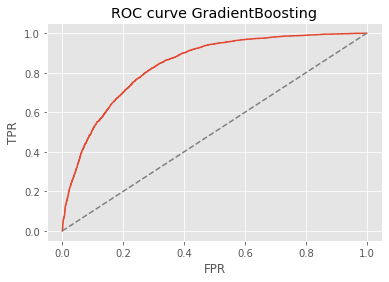

In [378]:
#Curva ROC Gradient Boosting
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve GradientBoosting')
plt.show()

In [319]:
#Perfromance nas bases treino teste e validacao
#Comparando o score nas 3 bases
score_train_gb = gb.score(X_train, y_train)
score_test_gb = gb.score(X_test, y_test)
score_val_gb = gb.score(X_val, y_val)

print("Score TRAIN: ", score_train_gb)
print("Score TEST: ", score_test_gb)
print("Score VALIDACAO: ", score_val_gb)

Score TRAIN:  0.7837077793061287
Score TEST:  0.7626994315055933
Score VALIDACAO:  0.7647867950481431


In [376]:
#K-Fold no Gradient Boosting
gb = GradientBoostingClassifier(max_depth=4, random_state=42)
gb_scores = model_selection.cross_val_score(gb, df_X, np.ravel(df_y), cv=kf)

In [377]:
print("Accuracy: %0.3f (+/- %0.3f)" % (gb_scores.mean(), gb_scores.std() * 2))

Accuracy: 0.765 (+/- 0.015)


COMPARAÇÃO

In [381]:
models = [ 
    ('DecisionTree', DecisionTreeClassifier(max_depth=9, min_samples_split=2, min_samples_leaf=11,random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=150, max_depth=13, min_samples_split=50, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(learning_rate=0.05516190250063313, n_estimators=750, max_depth=4, min_samples_split=50, random_state=42))
]

ROC AUC Score for DecisionTree: 0.8031596978715105
ROC AUC Score for RandomForest: 0.8327632827538352
ROC AUC Score for GradientBoosting: 0.8406037576840584


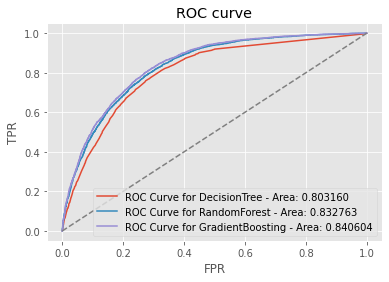

In [383]:
plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, np.ravel(y_train))
    predictions = model_instance.predict_proba(X_val)[:,1]
    auc_score = metrics.roc_auc_score(y_val, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_val, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

CONCLUSÕES:


- O modelo GradienteBoosting foi o que apresentou melhores resultados, tanto em metrica ROC, quanto em Recall/Precision/F1-Score. 

- Optei por ajustar os parâmetros ideais focando no recall, uma vez que se tratando de identificar uma doença cardiaca, devemos otimizar em prever a maior parte possível dos dados verdadeiramento positivos. Entretando, as duas métricas ficaram bem próximas em todos os modelos.

- A variável que mais influência na classificação, tanto em DecisionTree quanto RandomForest é "Dificuldade para andar".
